In [1]:
!pip install jovian opendatasets --upgrade --quiet
import jovian
project_name = 'abc'

In [2]:
dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings' 

In [3]:
#import opendatasets as od
#od.download(dataset_url)

In [4]:
project_name = "analysis-on-world-university-rankings" 

In [5]:
#!pip install jovian --upgrade -q
#!pip install plotly
#!pip install cufflinks

In [6]:
#jovian.commit(project=project_name)

# <center>Data Preparation and Cleaning</center>

Here various modes of displaying dataset which is in CSV format.
First step is to load the data using pandas read_csv function. the data is stored in mutidimensional table called as dataframe.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [8]:
school_country_table_df = pd.read_csv('world-university-rankings/school_and_country_table.csv') #read the data using pandas and store it in a variable 
world_university_rankings_df = pd.read_csv('world-university-rankings/cwurData.csv')
times_data_df = pd.read_csv('world-university-rankings/timesData.csv')

In [9]:
world_university_rankings_df #display the data (completely)

world_rank                            institution         country  \
0              1                     Harvard University             USA   
1              2  Massachusetts Institute of Technology             USA   
2              3                    Stanford University             USA   
3              4                University of Cambridge  United Kingdom   
4              5     California Institute of Technology             USA   
...          ...                                    ...             ...   
2195         996              University of the Algarve        Portugal   
2196         997                  Alexandria University           Egypt   
2197         998            Federal University of Ceará          Brazil   
2198         999                 University of A Coruña           Spain   
2199        1000        China Pharmaceutical University           China   

      national_rank  quality_of_education  alumni_employment  \
0                 1                     7                  9   
1                 2                     9                 17   
2                 3                    17                 11   
3                 1                    10                 24   
4                 4                     2                 29   
...             ...                   ...                ...   
2195              7                   367                567   
2196              4                   236                566   
2197             18                   367                549   
2198             40                   367                567   
2199             83                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
0                      1             1          1          1           NaN   
1                      3            12          4          4           NaN   
2                      5             4          2          2           NaN   
3                      4            16         16         11           NaN   
4                      7            37         22         22           NaN   
...                  ...           ...        ...        ...           ...   
2195                 218           926        845        812         969.0   
2196                 218           997        908        645         981.0   
2197                 218           830        823        812         975.0   
2198                 218           886        974        812         975.0   
2199                 218           861        991        812         981.0   

      patents   score  year  
0           5  100.00  2012  
1           1   91.67  2012  
2          15   89.50  2012  
3          50   86.17  2012  
4          18   85.21  2012  
...       ...     ...   ...  
2195      816   44.03  2015  
2196      871   44.03  2015  
2197      824   44.03  2015  
2198      651   44.02  2015  
2199      547   44.02  2015  

[2200 rows x 14 columns]

In [10]:
world_university_rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


On checking the 10th row, we see that there are 200 entries missing, other than that none of the other columns have any missing entries.

Also, Except the institution name and country column, all the other columns have only numerical entries.

In [11]:
world_university_rankings_df.describe()

world_rank  national_rank  quality_of_education  alumni_employment  \
count  2200.000000    2200.000000           2200.000000        2200.000000   
mean    459.590909      40.278182            275.100455         357.116818   
std     304.320363      51.740870            121.935100         186.779252   
min       1.000000       1.000000              1.000000           1.000000   
25%     175.750000       6.000000            175.750000         175.750000   
50%     450.500000      21.000000            355.000000         450.500000   
75%     725.250000      49.000000            367.000000         478.000000   
max    1000.000000     229.000000            367.000000         567.000000   

       quality_of_faculty  publications    influence    citations  \
count         2200.000000   2200.000000  2200.000000  2200.000000   
mean           178.888182    459.908636   459.797727   413.417273   
std             64.050885    303.760352   303.331822   264.366549   
min              1.000000      1.000000     1.000000     1.000000   
25%            175.750000    175.750000   175.750000   161.000000   
50%            210.000000    450.500000   450.500000   406.000000   
75%            218.000000    725.000000   725.250000   645.000000   
max            218.000000   1000.000000   991.000000   812.000000   

       broad_impact      patents        score         year  
count   2000.000000  2200.000000  2200.000000  2200.000000  
mean     496.699500   433.346364    47.798395  2014.318182  
std      286.919755   273.996525     7.760806     0.762130  
min        1.000000     1.000000    43.360000  2012.000000  
25%      250.500000   170.750000    44.460000  2014.000000  
50%      496.000000   426.000000    45.100000  2014.000000  
75%      741.000000   714.250000    47.545000  2015.000000  
max     1000.000000   871.000000   100.000000  2015.000000

In [12]:
world_university_rankings_df.shape  #To display the shape of the data (rows, columns)

(2200, 14)

In [13]:
world_university_rankings_df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

<h2>This Cell is to Explain the details of all Columns :</h2>

world_rank - world rank for university.

institution - name of university

country - country of each university

national_rank - rank of university within its country

quality_of_education - rank for quality of education

alumni_employment - rank for alumni employment

quality_of_faculty - rank for quality of faculty

publications - rank for publications

influence - rank for influence

citations - number of students at the university

broad_impact - rank for broad impact (only available for 2014 and 2015)

patents - rank for patents

score - total score, used for determining world rank

year - year of ranking (2012 to 2015)


In [14]:
world_university_rankings_df.sort_values(by = 'institution').head(10) #Display top 30 rows and Sort by institution name column

world_rank                               institution         country  \
852          653  AGH University of Science and Technology          Poland   
1981         782  AGH University of Science and Technology          Poland   
792          593                        Aalborg University         Denmark   
1764         565                        Aalborg University         Denmark   
591          392                          Aalto University         Finland   
1620         421                          Aalto University         Finland   
1321         122                         Aarhus University         Denmark   
318          119                         Aarhus University         Denmark   
999          800                    Aberystwyth University  United Kingdom   
2013         814                    Aberystwyth University  United Kingdom   

      national_rank  quality_of_education  alumni_employment  \
852               3                   257                197   
1981              4                   267                279   
792               5                   355                384   
1764              5                   367                439   
591               4                   355                251   
1620              4                   367                224   
1321              2                   310                165   
318               2                   292                188   
999              59                   355                478   
2013             59                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
852                  210           722        881        609         909.0   
1981                 218           708        891        511         896.0   
792                  210           606        633        363         543.0   
1764                 218           596        660        287         520.0   
591                  210           344        434        609         460.0   
1620                 218           336        403        645         424.0   
1321                 106            91         81        101          95.0   
318                  107            90         78         81          90.0   
999                  210           818        562        493         716.0   
2013                 218           842        552        511         754.0   

      patents  score  year  
852       552  44.71  2014  
1981      398  44.26  2015  
792       426  44.83  2014  
1764      401  44.59  2015  
591       138  45.58  2014  
1620      246  45.10  2015  
1321      154  49.65  2015  
318       194  50.17  2014  
999       481  44.53  2014  
2013      607  44.22  2015

In [15]:
world_university_rankings_df.head(10) #To display top 10 rows from the dataset

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   
5           6                   Princeton University             USA   
6           7                   University of Oxford  United Kingdom   
7           8                        Yale University             USA   
8           9                    Columbia University             USA   
9          10     University of California, Berkeley             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   
5              5                     8                 14                   2   
6              2                    13                 28                   9   
7              6                    14                 31                  12   
8              7                    23                 21                  10   
9              8                    16                 52                   6   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012  
5            53         33         26           NaN      101   82.50  2012  
6            15         13         19           NaN       26   82.34  2012  
7            14          6         15           NaN       66   79.14  2012  
8            13         12         14           NaN        5   78.86  2012  
9             6          5          3           NaN       16   78.55  2012

In [16]:
world_university_rankings_df.tail(10) #To display bottom 10 rows from the dataset

world_rank                      institution       country  \
2190         991                Xidian University         China   
2191         992      Federal University of Bahia        Brazil   
2192         993    Southwest Jiaotong University         China   
2193         994               Ryerson University        Canada   
2194         995        King Abdulaziz University  Saudi Arabia   
2195         996        University of the Algarve      Portugal   
2196         997            Alexandria University         Egypt   
2197         998      Federal University of Ceará        Brazil   
2198         999           University of A Coruña         Spain   
2199        1000  China Pharmaceutical University         China   

      national_rank  quality_of_education  alumni_employment  \
2190             81                   367                542   
2191             17                   367                540   
2192             82                   367                327   
2193             33                   367                567   
2194              4                   367                449   
2195              7                   367                567   
2196              4                   236                566   
2197             18                   367                549   
2198             40                   367                567   
2199             83                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
2190                 218           830        974        812         984.0   
2191                 218           962        865        645         969.0   
2192                 218           937        962        812         998.0   
2193                 218           811        969        511         975.0   
2194                 218           595        430        645         994.0   
2195                 218           926        845        812         969.0   
2196                 218           997        908        645         981.0   
2197                 218           830        823        812         975.0   
2198                 218           886        974        812         975.0   
2199                 218           861        991        812         981.0   

      patents  score  year  
2190      434  44.03  2015  
2191      774  44.03  2015  
2192      861  44.03  2015  
2193      756  44.03  2015  
2194      839  44.03  2015  
2195      816  44.03  2015  
2196      871  44.03  2015  
2197      824  44.03  2015  
2198      651  44.02  2015  
2199      547  44.02  2015

In [17]:
world_university_rankings_df['country'].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
South Korea              72
Canada                   72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Austria                  24
Sweden                   24
Israel                   22
Turkey                   20
Belgium                  20
Finland                  20
Poland                   18
Ireland                  16
Iran                     16
Greece                   14
Portugal                 14
Denmark                  12
New Zealand              12
Norway                   12
Hong Kong                12
Hungary                  12
Czech Republic           10
South Africa             10
Russia                    9
Egypt               

In [18]:
world_university_rankings_df.groupby("year").mean()

world_rank  national_rank  quality_of_education  alumni_employment  \
year                                                                       
2012        50.5         18.140                66.420             75.390   
2013        50.5         17.620                65.760             75.910   
2014       500.5         42.524               292.164            363.991   
2015       500.5         42.512               299.839            406.536   

      quality_of_faculty  publications  influence  citations  broad_impact  \
year                                                                         
2012              56.930        55.020     54.890     54.420           NaN   
2013              56.060        54.670     56.280     53.930           NaN   
2014             188.002       500.411    500.163    447.349       496.735   
2015             194.253       500.419    500.275    451.334       496.664   

      patents     score  
year                     
2012   63.650  54.94090  
2013   63.550  55.27120  
2014  448.968  47.27141  
2015  491.674  46.86385

In [19]:
world_university_rankings_df.cov()

world_rank  national_rank  quality_of_education  \
world_rank            92610.883046    3756.208897          25090.710964   
national_rank          3756.208897    2677.117668           1337.353580   
quality_of_education  25090.710964    1337.353580          14868.168622   
alumni_employment     37999.668548    1307.965670          13811.196536   
quality_of_faculty    12940.021084     738.478596           6140.110828   
publications          85325.970338    5137.155941          23136.694494   
influence             82697.881289    2528.196358          23880.176763   
citations             68913.128033    2555.112610          20323.080392   
broad_impact          78124.813157    2653.468893          15994.173538   
patents               58218.971227    2260.347442          17644.381289   
score                 -1296.844868     -80.212209           -568.300430   
year                     74.413990       4.059697             39.749287   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                 37999.668548        12940.021084  85325.970338   
national_rank               1307.965670          738.478596   5137.155941   
quality_of_education       13811.196536         6140.110828  23136.694494   
alumni_employment          34886.488848         6682.961227  32458.514088   
quality_of_faculty          6682.961227         4102.515913  12343.406787   
publications               32458.514088        12343.406787  92270.351358   
influence                  29879.417455        12753.093334  80618.202976   
citations                  27612.293206        11043.414574  66645.291893   
broad_impact               20890.475419         8259.593611  76024.618017   
patents                    27032.610725         9741.978720  55893.294051   
score                       -739.815933         -344.749347  -1230.838437   
year                          60.884596           23.664972     73.675286   

                         influence     citations  broad_impact       patents  \
world_rank            82697.881289  68913.128033  78124.813157  58218.971227   
national_rank          2528.196358   2555.112610   2653.468893   2260.347442   
quality_of_education  23880.176763  20323.080392  15994.173538  17644.381289   
alumni_employment     29879.417455  27612.293206  20890.475419  27032.610725   
quality_of_faculty    12753.093334  11043.414574   8259.593611   9741.978720   
publications          80618.202976  66645.291893  76024.618017  55893.294051   
influence             92010.194174  67777.798857  75775.229924  50848.789510   
citations             67777.798857  69889.672098  61194.223232  43369.161000   
broad_impact          75775.229924  61194.223232  82322.945673  41928.455188   
patents               50848.789510  43369.161000  41928.455188  75074.095530   
score                 -1230.811052  -1071.885442  -1005.202078  -1009.651954   
year                     73.583716     66.241432     -0.017759     76.965232   

                            score       year  
world_rank           -1296.844868  74.413990  
national_rank          -80.212209   4.059697  
quality_of_education  -568.300430  39.749287  
alumni_employment     -739.815933  60.884596  
quality_of_faculty    -344.749347  23.664972  
publications         -1230.838437  73.675286  
influence            -1230.811052  73.583716  
citations            -1071.885442  66.241432  
broad_impact         -1005.202078  -0.017759  
patents              -1009.651954  76.965232  
score                   60.230116  -1.414428  
year                    -1.414428   0.580843

# <center>Exploratory Analysis and Visualization</center>

Few randomly created analysis on world university ranking dataset

Visualize the Dataset, using Matplotlib,Seaborn library 

In [20]:
world_university_rankings_df.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

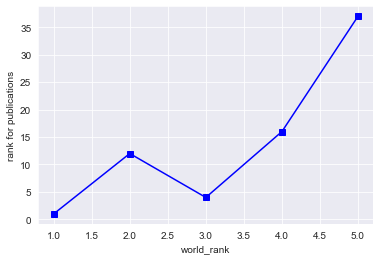

In [21]:
a= world_university_rankings_df['world_rank'].head(5)
b = world_university_rankings_df['publications'].head(5)
plt.plot(a, b, 's-b');
plt.xlabel('world_rank');
plt.ylabel('rank for publications');

Text(0.5, 1.0, 'Variation of total scores scored by different universities')

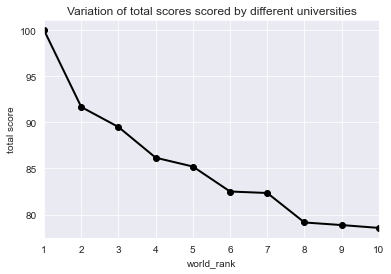

In [22]:
a= world_university_rankings_df['world_rank'].head(10)
b = world_university_rankings_df['score'].head(10)
plt.plot(a, b, color='black', marker='o', linestyle='-', linewidth=2, markersize=6);
plt.xlabel('world_rank');
plt.ylabel('total score');
plt.xlim(1, 10);
plt.title('Variation of total scores scored by different universities')

In [23]:
#times_data_df.head()

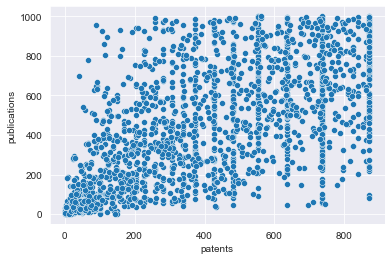

In [24]:
a= world_university_rankings_df['patents']
b = world_university_rankings_df['publications']
sns.scatterplot(x=a,y=b);

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


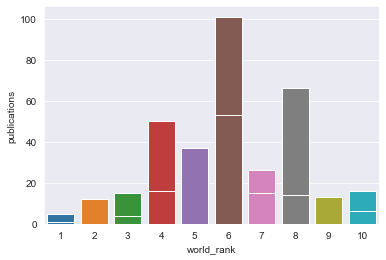

In [25]:
a= world_university_rankings_df['world_rank'].head(10)
b = world_university_rankings_df['patents'].head(10);
c = world_university_rankings_df['publications'].head(10);
sns.barplot(a,b);
sns.barplot(a,c);

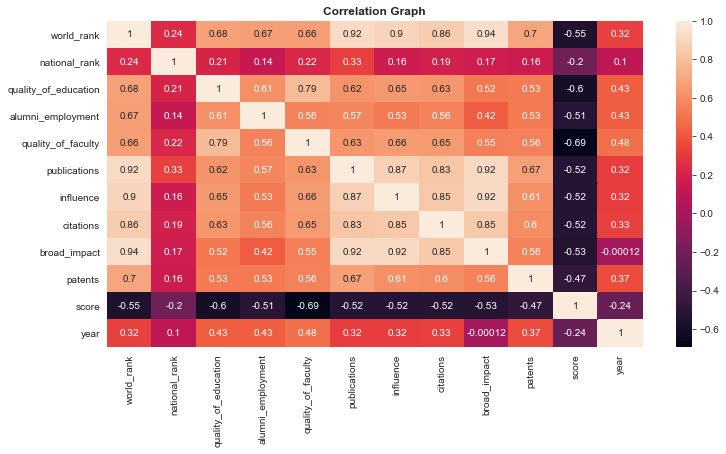

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(world_university_rankings_df.corr(), annot=True);
plt.title("Correlation Graph", fontweight="bold");

Taking a close look at the above heatmap, we can conclude that:

World Rank is highly correlated toBroad Impact, Citations, Influence and Publications.

It is also somewhat correlated to Patents, Quality of Faculty, Alumni Employment, Quality of Education etc.



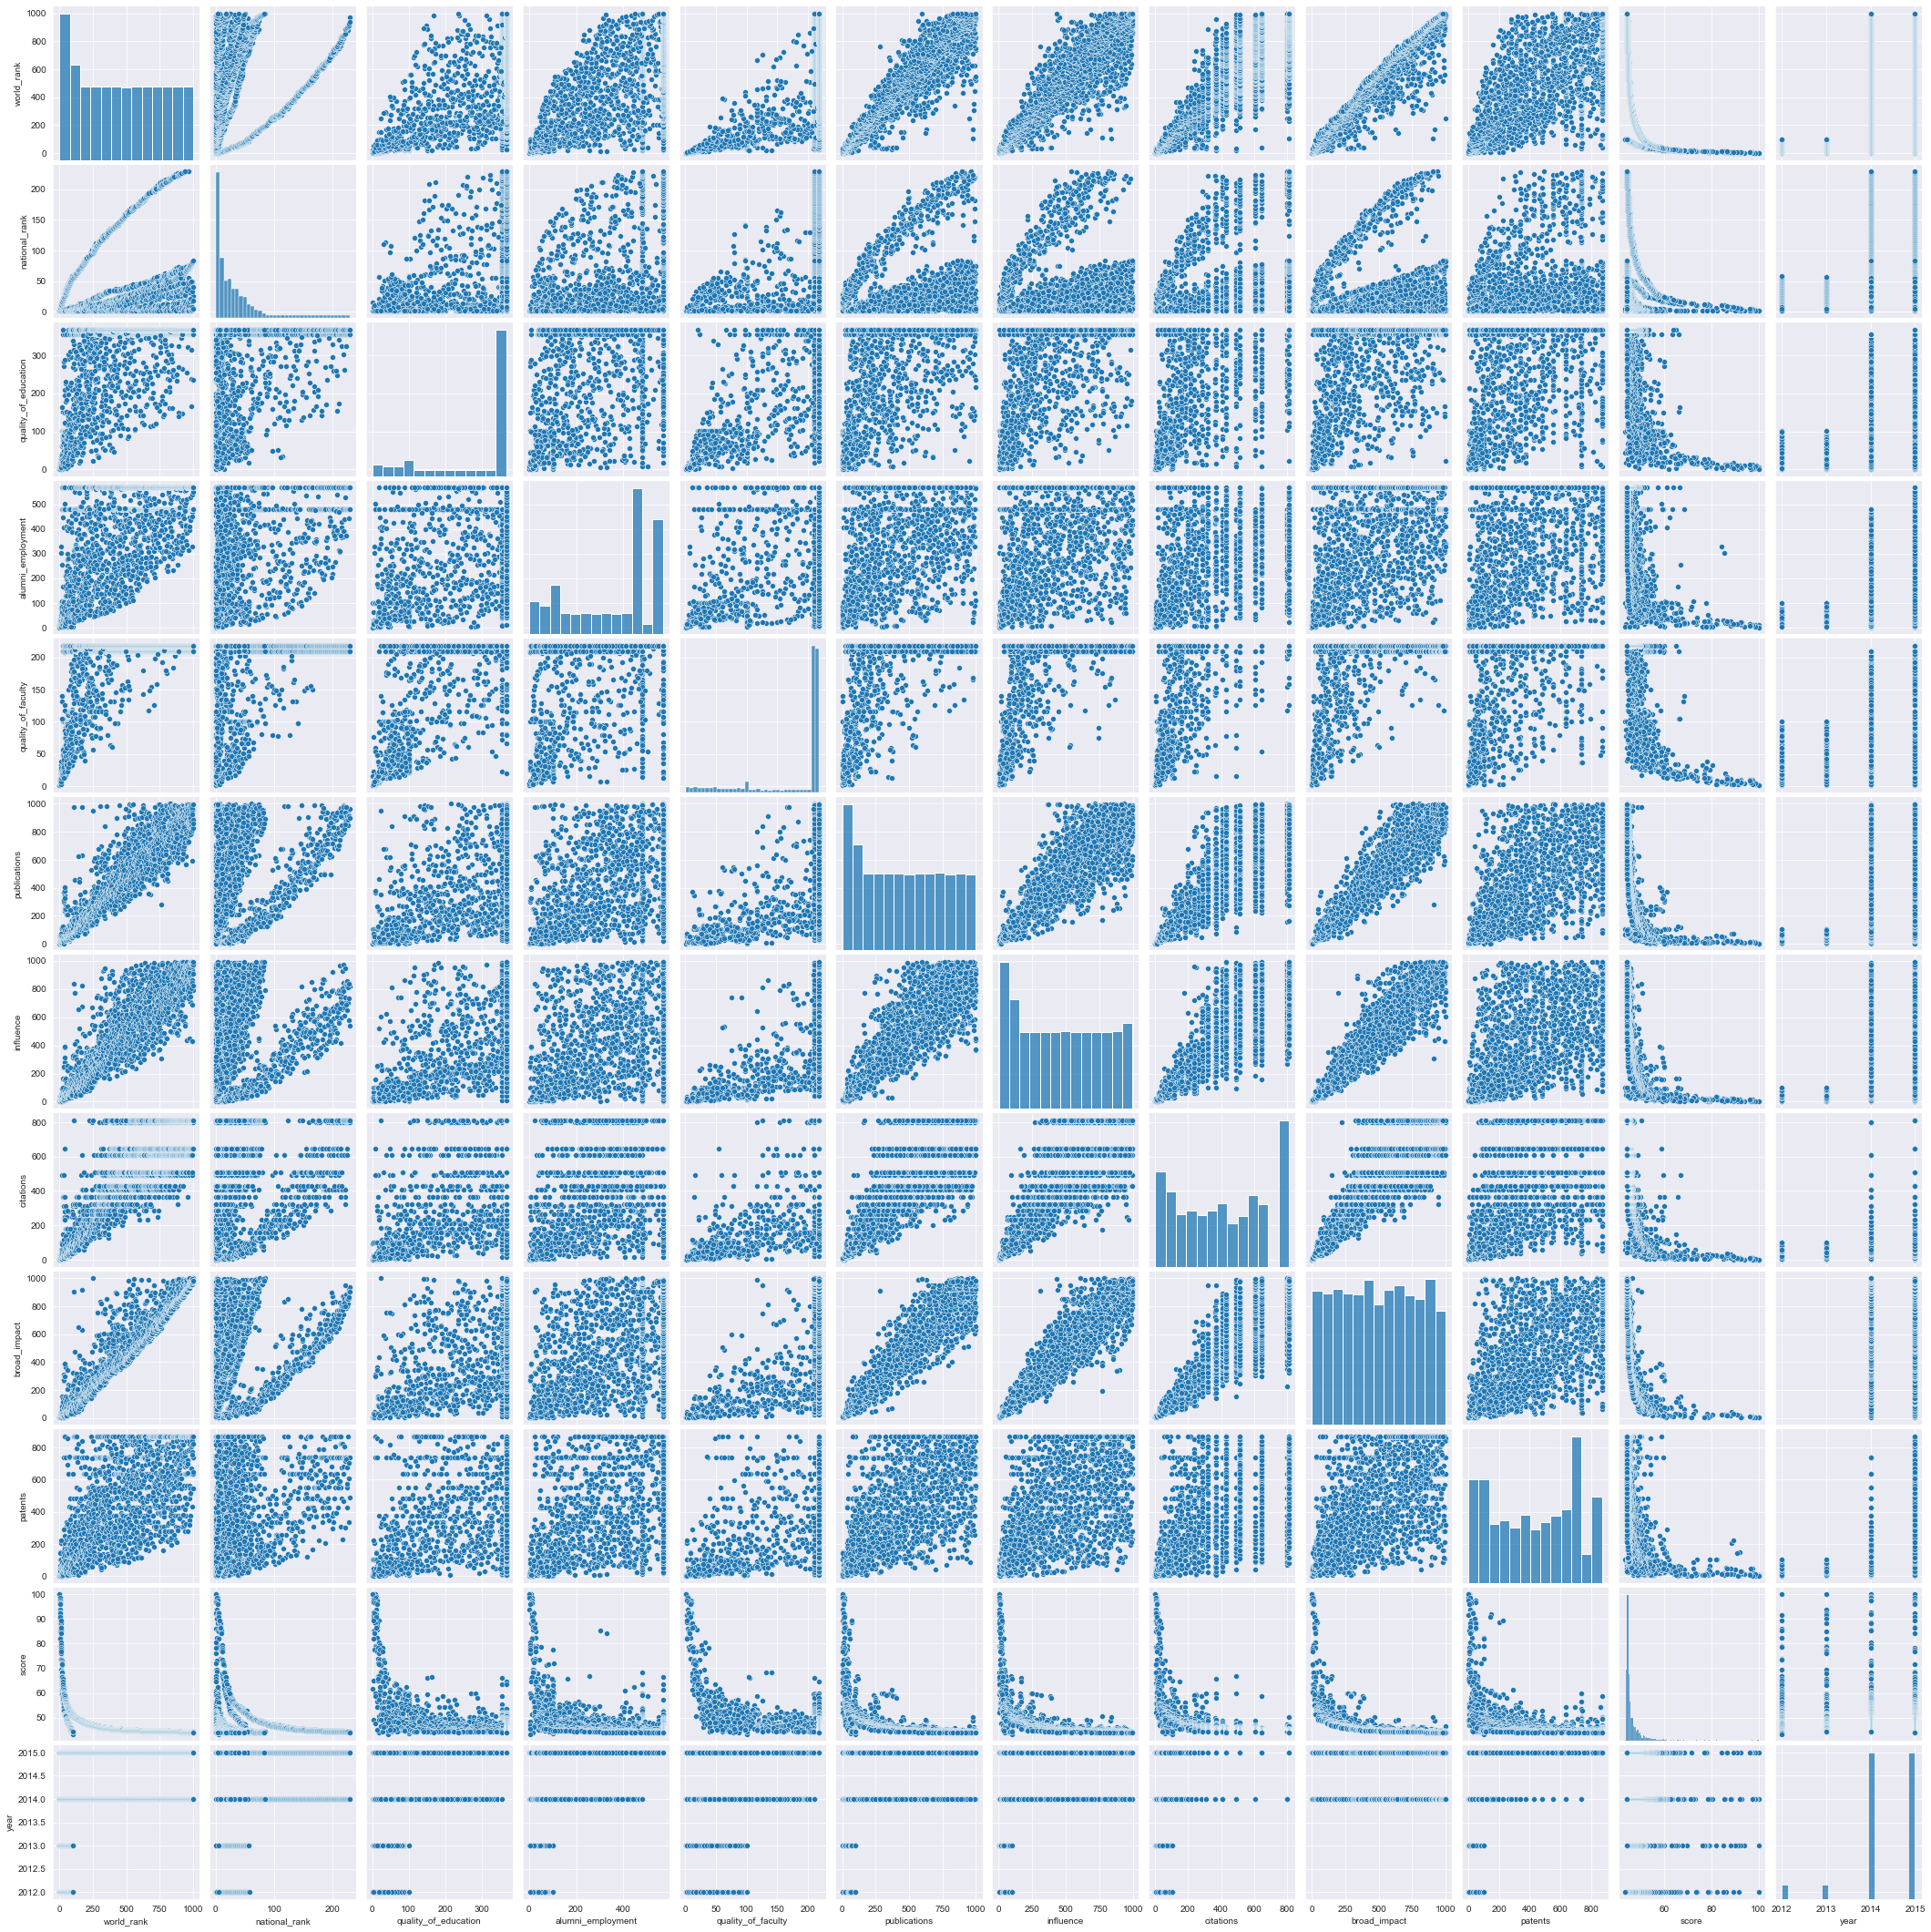

In [27]:
sns.pairplot(world_university_rankings_df);


In [28]:
times_data_df.head(10)

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   
5          6                University of Cambridge            United Kingdom   
6          6                   University of Oxford            United Kingdom   
7          8     University of California, Berkeley  United States of America   
8          9                Imperial College London            United Kingdom   
9         10                        Yale University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   
5      90.5          77.7      94.1       94.0   57.0        91.2   
6      88.2          77.2      93.9       95.1   73.5        91.2   
7      84.2          39.6      99.3       97.8      -        91.1   
8      89.2          90.0      94.5       88.3   92.9        90.6   
9      92.1          59.2      89.7       91.5      -        89.5   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   
5       18,812                 11.8                    34%           46 : 54   
6       19,919                 11.6                    34%           46 : 54   
7       36,186                 16.4                    15%           50 : 50   
8       15,060                 11.7                    51%           37 : 63   
9       11,751                  4.4                    20%           50 : 50   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011  
5  2011  
6  2011  
7  2011  
8  2011  
9  2011

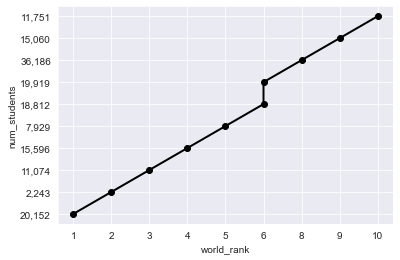

In [29]:
a= times_data_df['world_rank'].head(10)
b = times_data_df['num_students'].head(10)
plt.plot(a, b, color='black', marker='o', linestyle='-', linewidth=2, markersize=6);
plt.xlabel('world_rank');
plt.ylabel('num_students');
#plt.ylim(2000, );
#plt.title('Variation of total scores scored by different universities')

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


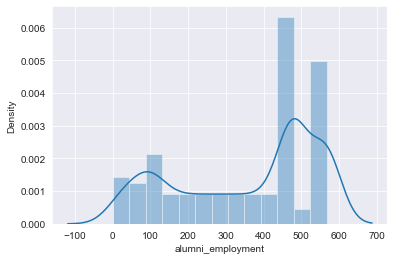

In [30]:
sns.distplot(world_university_rankings_df.alumni_employment);

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-31-62bb72d219c6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=world_university_rankings_df.country, rotation='90')


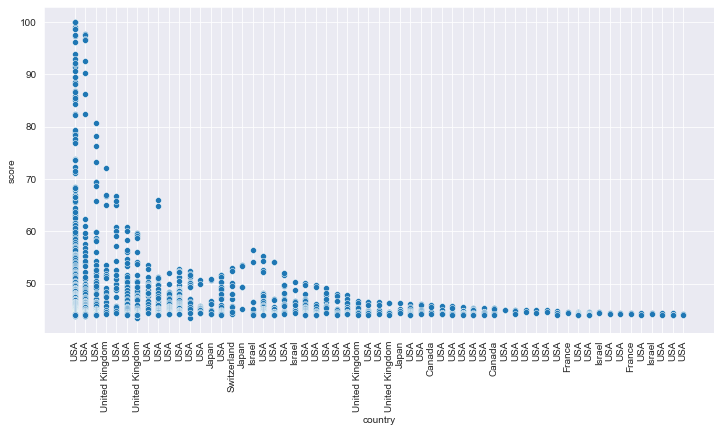

In [31]:
plt.figure(figsize=(12,6))
f = sns.scatterplot(world_university_rankings_df.country, world_university_rankings_df.score)
f.set_xticklabels(labels=world_university_rankings_df.country, rotation='90')
f;

In [32]:
count = world_university_rankings_df.country.value_counts()
count

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
South Korea              72
Canada                   72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Austria                  24
Sweden                   24
Israel                   22
Turkey                   20
Belgium                  20
Finland                  20
Poland                   18
Ireland                  16
Iran                     16
Greece                   14
Portugal                 14
Denmark                  12
New Zealand              12
Norway                   12
Hong Kong                12
Hungary                  12
Czech Republic           10
South Africa             10
Russia                    9
Egypt               

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

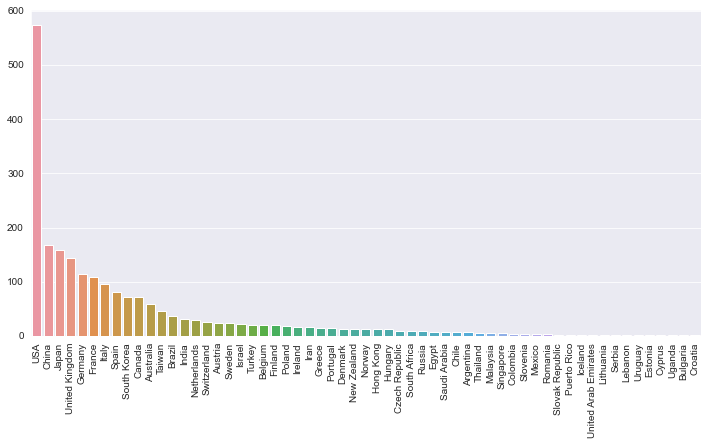

In [33]:
plt.figure(figsize=(12,6))
fig = sns.barplot(count.index, count.values);
fig.set_xticklabels(labels = count.index, rotation='90');
fig

In [34]:
import plotly.graph_objs as go
t = np.linspace(40, 80, 100)
x, y, z = world_university_rankings_df.world_rank, world_university_rankings_df.publications, t

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=8,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
import plotly
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#plotly.offline.plot(fig, filename='my3Dplot.html')

fig.show()

# <center>Asking and answering some questions about the data</center>

### Q1: Retrieve a list of countries from the dataframe

In [35]:
world_university_rankings_df.country.value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
South Korea              72
Canada                   72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Austria                  24
Sweden                   24
Israel                   22
Turkey                   20
Belgium                  20
Finland                  20
Poland                   18
Ireland                  16
Iran                     16
Greece                   14
Portugal                 14
Denmark                  12
New Zealand              12
Norway                   12
Hong Kong                12
Hungary                  12
Czech Republic           10
South Africa             10
Russia                    9
Egypt               

In [36]:
world_university_rankings_df.head(2)

world_rank                            institution country  national_rank  \
0           1                     Harvard University     USA              1   
1           2  Massachusetts Institute of Technology     USA              2   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                     7                  9                   1             1   
1                     9                 17                   3            12   

   influence  citations  broad_impact  patents   score  year  
0          1          1           NaN        5  100.00  2012  
1          4          4           NaN        1   91.67  2012

### Q2: How many universities are included in this dataset 

In [37]:
world_university_rankings_df.shape[0]

2200

### Q3: Create a dataframe containing 10 countries with the best rank for publications.

In [38]:
highest_population_df = world_university_rankings_df.sort_values(by='publications').head(10)
highest_population_df

world_rank                        institution country  national_rank  \
0              1                 Harvard University     USA              1   
1200           1                 Harvard University     USA              1   
200            1                 Harvard University     USA              1   
100            1                 Harvard University     USA              1   
1231          32              University of Toronto  Canada              1   
128           29              University of Toronto  Canada              1   
33            34  University of Michigan, Ann Arbor     USA             24   
230           31              University of Toronto  Canada              1   
1218          19  University of Michigan, Ann Arbor     USA             15   
220           21  University of Michigan, Ann Arbor     USA             16   

      quality_of_education  alumni_employment  quality_of_faculty  \
0                        7                  9                   1   
1200                     1                  1                   1   
200                      1                  1                   1   
100                      1                  1                   1   
1231                    70                 51                  32   
128                     91                 81                  34   
33                      68                 60                 101   
230                     71                 45                  35   
1218                    24                 17                 140   
220                     29                 19                 131   

      publications  influence  citations  broad_impact  patents   score  year  
0                1          1          1           NaN        5  100.00  2012  
1200             1          1          1           1.0        3  100.00  2015  
200              1          1          1           1.0        2  100.00  2014  
100              1          1          1           NaN        7  100.00  2013  
1231             2         17          9           8.0      145   60.04  2015  
128              2         13         12           NaN      101   56.11  2013  
33               2         17          7           NaN        8   53.72  2012  
230              2         18         13           8.0      149   60.87  2014  
1218             3         20          6          14.0       12   68.36  2015  
220              3         20          5          10.0       19   68.27  2014

### Q4: Create a dataframe containing 10 institutions with the best world_rank, among the counties with publications rank greater than 10.

In [39]:
ans_df = world_university_rankings_df.sort_values(by='world_rank').head(20)
ans_df[ans_df.publications > 10]

world_rank                            institution         country  \
1              2  Massachusetts Institute of Technology             USA   
1202           3  Massachusetts Institute of Technology             USA   
102            3                   University of Oxford  United Kingdom   
202            3  Massachusetts Institute of Technology             USA   
103            4  Massachusetts Institute of Technology             USA   
3              4                University of Cambridge  United Kingdom   
1203           4                University of Cambridge  United Kingdom   
204            5                   University of Oxford  United Kingdom   
4              5     California Institute of Technology             USA   

      national_rank  quality_of_education  alumni_employment  \
1                 2                     9                 17   
1202              3                     3                 11   
102               1                     7                 12   
202               3                     3                 11   
103               3                     2                 16   
3                 1                    10                 24   
1203              1                     2                 10   
204               2                     7                 12   
4                 4                     2                 29   

      quality_of_faculty  publications  influence  citations  broad_impact  \
1                      3            12          4          4           NaN   
1202                   2            15          2          2           2.0   
102                   10            11          7         13           NaN   
202                    2            15          2          2           2.0   
103                    2            16          3          3           NaN   
3                      4            16         16         11           NaN   
1203                   5            11          6         12          13.0   
204                   10            11         12         11          12.0   
4                      7            37         22         22           NaN   

      patents  score  year  
1           1  91.67  2012  
1202        1  97.54  2015  
102        15  92.54  2013  
202         1  98.69  2014  
103         1  91.45  2013  
3          50  86.17  2012  
1203       48  96.81  2015  
204        16  97.51  2014  
4          18  85.21  2012

### Q5: Create a data frame that counts the number institutions in each country

In [40]:
count_df = world_university_rankings_df.groupby(by='country').count()
count_df['institution']

country
Argentina                 7
Australia                58
Austria                  24
Belgium                  20
Brazil                   36
Bulgaria                  2
Canada                   72
Chile                     8
China                   167
Colombia                  4
Croatia                   2
Cyprus                    2
Czech Republic           10
Denmark                  12
Egypt                     8
Estonia                   2
Finland                  20
France                  109
Germany                 115
Greece                   14
Hong Kong                12
Hungary                  12
Iceland                   2
India                    31
Iran                     16
Ireland                  16
Israel                   22
Italy                    96
Japan                   159
Lebanon                   2
Lithuania                 2
Malaysia                  6
Mexico                    4
Netherlands              29
New Zealand              12
Norway      

### Q6: List top 10 countries with highest number of institutes given in this dataframe 

In [41]:
count_df['institution'].sort_values(ascending=False).head(10)

country
USA               573
China             167
Japan             159
United Kingdom    144
Germany           115
France            109
Italy              96
Spain              81
South Korea        72
Canada             72
Name: institution, dtype: int64

### Q7: Count the number of institutes for which the broad_impact data is missing.

In [42]:
world_university_rankings_df['broad_impact'].isna().sum()

200

In [43]:
world_university_rankings_df.head(1)

world_rank         institution country  national_rank  \
0           1  Harvard University     USA              1   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                     7                  9                   1             1   

   influence  citations  broad_impact  patents  score  year  
0          1          1           NaN        5  100.0  2012

# <center> Inferences and Conclusion </center>

The dataset contains immense possibilities to improve Analytical study and research values and have a positive impact. It is not limited to the problem taken into consideration for this project. Many other interesting possibilities can be explored using this dataset.

The ways in which questions can be asked varies, so does the way of tackling a problem. Only the one that has been minutely observed and tested will provide results worth trusting.

Taking a close look at the above heatmap, we can conclude that:
World Rank is highly correlated to Broad Impact, Citations, Influence and Publications.
It is also somewhat correlated to Patents, Quality of Faculty, Alumni Employment, Quality of Education etc.



# <center>References and Future Work</center>

#### References includes :
The Official Links for the Matplotlib, Seaborn, Data World, Pandas Dataframes, Numpy are all have been included at the Top section.


#### Future Works includes :

* Implementing Machine Learning models.
* Prediction of the number of users by using the regression model.
* Exploring the correlation between world rank and publications, patents, quality_of_education, citations etc


## Thanks for Studying my Project.

In [44]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rohandinesh-blr/analysis-on-world-university-rankings" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rohandinesh-blr/analysis-on-world-university-rankings


'https://jovian.ai/rohandinesh-blr/analysis-on-world-university-rankings'

In [45]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rohandinesh-blr/analysis-on-world-university-rankings" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rohandinesh-blr/analysis-on-world-university-rankings
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
